###  Описание кейса и цель проекта

Развлекательное приложение Procrastinate Pro+ несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки. 
Задача — разобраться в причинах и помочь компании выйти в плюс.

### Загружаем данные и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

#### Первичный анализ таблицы Visits

In [3]:
print(visits.info())
print(visits.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
             User Id         Region   Device         Channel  \
62104   882096263058  United States      Mac          TipTop   
61871   626173431893  United States      Mac          TipTop   
244368  693135129252         France  Android  WahooNetBanner   
76160   207772302708  United States      Mac         organic   
230997  403597819314         France  Android         organic   

              Session Start          Session End  
62104   2019-07-02 15:54:58  2019-07-02 16:25:

In [4]:
# приведём названия полей к PEP-8

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

In [5]:
# преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [7]:
# посмотрим на статистику по пустым значениям

pd.DataFrame(visits.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
session_end,0.000000
session_start,0.000000
channel,0.000000
device,0.000000
region,0.000000
user_id,0.000000


In [8]:
# проверим наличие полных дубликатов

visits.duplicated().sum()

0

#### Первичный анализ таблицы Orders

In [9]:
print(orders.info())
print(orders.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
            User Id             Event Dt  Revenue
33580  873773748256  2019-08-20 21:06:46     4.99
23499  964224732612  2019-10-11 17:23:34     4.99
4103   461743359295  2019-06-19 03:32:22     4.99
24480  580987808529  2019-10-15 10:56:13     4.99
28075  312506798840  2019-05-07 13:29:42     4.99


In [10]:
# приведём названия полей к нижнему регистру

orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

In [11]:
# преобразование данных о времени

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [12]:
# посмотрим на статистику по пустым значениям

pd.DataFrame(orders.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
revenue,0.000000
event_dt,0.000000
user_id,0.000000


In [13]:
# проверим наличие полных дубликатов

orders.duplicated().sum()

0

#### Первичный анализ таблицы Costs

In [14]:
print(costs.info())
print(costs.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
              dt         Channel    costs
60    2019-06-30        FaceBoom  264.000
199   2019-05-20    MediaTornado    8.400
721   2019-05-02         YRabbit    9.900
471   2019-08-20  RocketSuperAds    6.175
1236  2019-10-04         LeapBob   14.280


In [15]:
#costs = costs.rename(columns={'dt': 'date'})
costs.columns = costs.columns.str.lower()

In [16]:
#costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


#### Обзор данных

In [17]:
visits.region.value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [18]:
visits.device.value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [19]:
visits.channel.value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [20]:
costs.channel.value_counts()

FaceBoom              180
TipTop                180
MediaTornado          180
OppleCreativeMedia    180
YRabbit               180
AdNonSense            180
RocketSuperAds        180
LeapBob               180
lambdaMediaAds        180
WahooNetBanner        180
Name: channel, dtype: int64

In [21]:
print(visits['session_start'].min())

print(visits['session_start'].max())

2019-05-01 00:00:41
2019-10-31 23:59:23


In [22]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [23]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

#### Промежуточный вывод по первичному анализу данных

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">

Данные загружены успешно, наименования столбцов и тип данных для дат приведены к корректному виду. Пропусков и дубликатов в данных не обнаружено. 

В вашем распоряжении три датасета:
    
    1. visits — лог сервера с информацией о посещениях сайта:
        user_id — уникальный идентификатор пользователя,
        region — страна пользователя,
        device — тип устройства пользователя,
        channel — идентификатор источника перехода,
        session_start — дата и время начала сессии,
        session_end — дата и время окончания сессии.
    
    2. orders — информация о заказах:
        user_id — уникальный идентификатор пользователя,
        event_dt — дата и время покупки,
        revenue — сумма заказа.
    
    3. costs — информацию о расходах на рекламу:
        dt — дата проведения рекламной кампании,
        channel — идентификатор рекламного источника,
        costs — расходы на эту кампанию.
    
- В анализе рассматриваются пользователи из четырёх стран: США, Великобритании, Франции и Германии
- Типов устройств пользователя тоже четыре: iPhone, Android, PC, Mac
- Есть 10 разных каналов привлечения пользователей
- Больше всего пользователей органические (заинтересованные пользователи, которые зашли на сайт по прямой ссылке или с помощью обычных запросов в поисковых системах, а не платных рекламных объявлений)
- Дата и время первый сессии - 2019-05-01 00:00:41
- Дата и время последней сессии - 2019-10-31 23:59:23
- Примем дату анализа как 1 ноября 2019 года
- Рекламных кампаний было 1800 по 180 штук на каждый канал

    
    
</div>  

### Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей

In [24]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчёта удержания

In [25]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта конверсии

In [26]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта LTV и ROI

In [27]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для сглаживания фрейма

In [28]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания

In [67]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=20):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии

In [68]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=20):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

#### Составляем профили пользователей. Определяем минимальную и максимальную даты привлечения пользователей.

In [32]:
# сами профили

profiles = get_profiles(visits, orders, costs)
profiles.sample(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
139910,933157085949,2019-10-07 02:05:59,OppleCreativeMedia,Mac,France,2019-10-07,2019-10-01,False,0.250000
28595,190368535253,2019-07-31 14:38:35,FaceBoom,iPhone,United States,2019-07-31,2019-07-01,False,1.100000
125255,835181178923,2019-10-06 02:32:41,YRabbit,Android,United States,2019-10-06,2019-10-01,False,0.223448
8296,55531100036,2019-07-31 11:24:27,WahooNetBanner,PC,Germany,2019-07-31,2019-07-01,False,0.600000
121862,812513194623,2019-05-13 21:44:53,organic,PC,United States,2019-05-13,2019-05-01,False,0.000000


In [33]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print(min_analysis_date, max_analysis_date)

2019-05-01 2019-10-27


Мы работаем с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Дату анализа выберана как 1 ноября 2019 года. Горизонт примем равным двум неделям

In [34]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()

# горизонт анализа выбираем равным 2 недели
horizon_days = 14

# максимально возможная дата привлечения с учётом горизонта
max_analysis_date= observation_date - timedelta(days=horizon_days - 1)
max_analysis_date

datetime.date(2019, 10, 19)

#### Выясняем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [35]:
(profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
    .sort_values(by=('mean', 'payer'), ascending=False)[::1].style.background_gradient('coolwarm')
)

,count,sum,mean
,payer,payer,payer
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


#### Узнаём, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

In [36]:
(
profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
.sort_values(by=('mean', 'payer'), ascending=False)[::1].style.background_gradient('coolwarm')
)

,count,sum,mean
,payer,payer,payer
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


#### Определяем каналы, из которых пришло больше всего платящих пользователей

In [37]:
(
profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
    .sort_values(by=('mean', 'payer'), ascending=False)[::1].style.background_gradient('coolwarm')
)

,count,sum,mean
,payer,payer,payer
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747


#### Промежуточный вывод по исследовательскому анализу данных

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">

1. Мы работаем с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Дату анализа выберана как 1 ноября 2019 года. Горизонт примем равным двум неделям. Исходя из этого:
   
    - Минимальная дата привлечения пользователей - 1 мая 2019 г. 
    - Максимальная дата с учетом горизонта - 19 октября 2019 г.

    
2. США существенно опережают остальные страны по количеству пользователей - 100 тысяч. Доля платящих пользователей также выше в США - 6,9%.
    

3. iPhone - самое популярное устройство. Количество клиентов - 54 тысячи, доля платящих пользователей - 6,2% (у MAC доля немного больше - 6,3% при 30 тысячах пользователей).
    

4. Больше всего пользователей, которые зашли на сайт по прямой ссылке или с помощью обычных запросов в поисковых системах, а не платных рекламных объявлений, таких 56 тысяч. Из них 1160 платящие - 2% это наименьшая доля среди остальных источников.
   Больше всего платных пользователей пришли с FaceBoom (3557 - 12,2%) и TipTop (1878 - 9,6%). Также высокие доли платных пользователей у AdNonSense (11,3%) и lambdaMediaAds (10,4%).
    
</div>  

### Маркетинг

#### Посчёт общей суммы расходов на маркетинг

In [38]:
# всего потрачено денег
round(costs.costs.sum(), 2)

105497.3

#### Сколько денег потратили на каждый источник?

In [39]:
# потрачено денег на каждый источник
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).style.background_gradient('coolwarm')

,costs
channel,
TipTop,54751.300000
FaceBoom,32445.600000
WahooNetBanner,5151.000000
AdNonSense,3911.250000
OppleCreativeMedia,2151.250000
RocketSuperAds,1833.000000
LeapBob,1797.600000
lambdaMediaAds,1557.600000
MediaTornado,954.480000


#### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [40]:
orders_monthly = orders.copy()
orders_monthly['date_of_purchase'] = orders_monthly['event_dt'].astype('datetime64[M]')
orders_monthly

,user_id,event_dt,revenue,date_of_purchase
0,188246423999,2019-05-01 23:09:52,4.99,2019-05-01
1,174361394180,2019-05-01 12:24:04,4.99,2019-05-01
2,529610067795,2019-05-01 11:34:04,4.99,2019-05-01
3,319939546352,2019-05-01 15:34:40,4.99,2019-05-01
4,366000285810,2019-05-01 13:59:51,4.99,2019-05-01
...,...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99,2019-10-01
40208,275341387049,2019-10-31 01:17:17,4.99,2019-10-01
40209,374656616484,2019-10-31 06:17:29,4.99,2019-10-01
40210,168548862926,2019-10-31 22:46:19,4.99,2019-10-01


In [41]:
# создание столбца с месяцем
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month

<AxesSubplot:xlabel='month'>

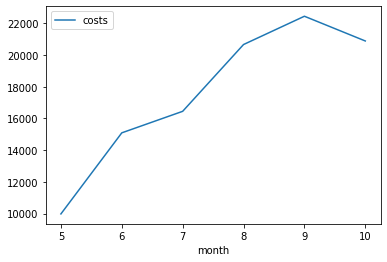

In [42]:
# потрачено всего денег по времени

costs.groupby('month').agg({'costs': 'sum'}).plot()

In [43]:
costs

,dt,channel,costs,month
0,2019-05-01,FaceBoom,113.3,5
1,2019-05-02,FaceBoom,78.1,5
2,2019-05-03,FaceBoom,85.8,5
3,2019-05-04,FaceBoom,136.4,5
4,2019-05-05,FaceBoom,122.1,5
...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10
1796,2019-10-24,lambdaMediaAds,6.4,10
1797,2019-10-25,lambdaMediaAds,8.8,10
1798,2019-10-26,lambdaMediaAds,8.8,10


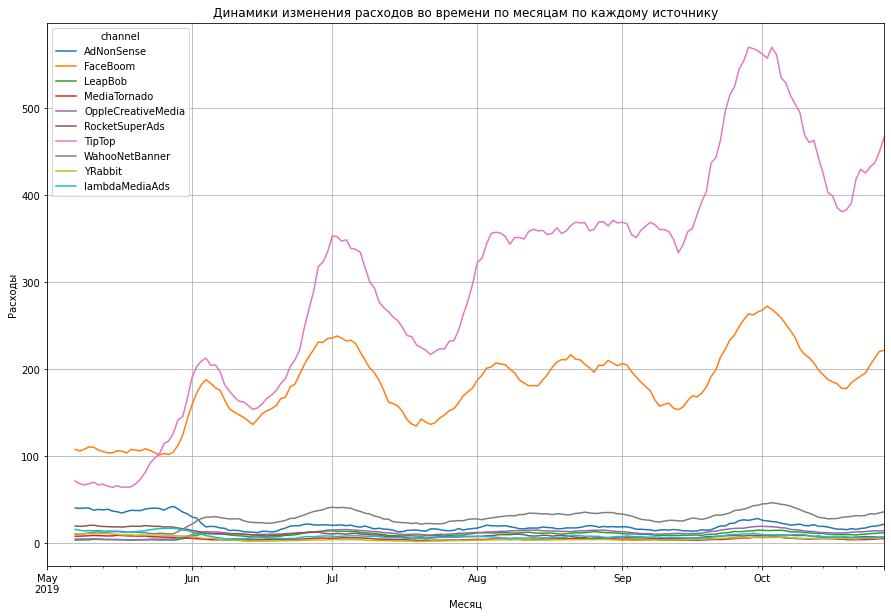

In [44]:
# визуализация изменений расходов

data = costs.pivot_table(
    index='dt',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
)
window = 7
filter_data(data, window).plot(figsize=(15, 10), grid=True)

plt.title('Динамики изменения расходов во времени по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

#### Cколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника?

In [45]:
# находим LTV с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [46]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()

# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-15,674
2019-10-16,656
2019-10-17,703


In [47]:
# средний CAC по каналам привлечения

CAC = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by='cac', ascending=False)
    .style.background_gradient('coolwarm')
)
CAC

,cac
channel,
TipTop,2.757774
FaceBoom,1.113419
AdNonSense,1.008023
lambdaMediaAds,0.727237
WahooNetBanner,0.601856
RocketSuperAds,0.417431
OppleCreativeMedia,0.249908
MediaTornado,0.219035
YRabbit,0.217087


In [48]:
# средний CAC по всему проекту без органических пользователей

ltv_profiles.query('channel != "organic"').agg({'acquisition_cost': 'mean'})

acquisition_cost    1.117794
dtype: float64

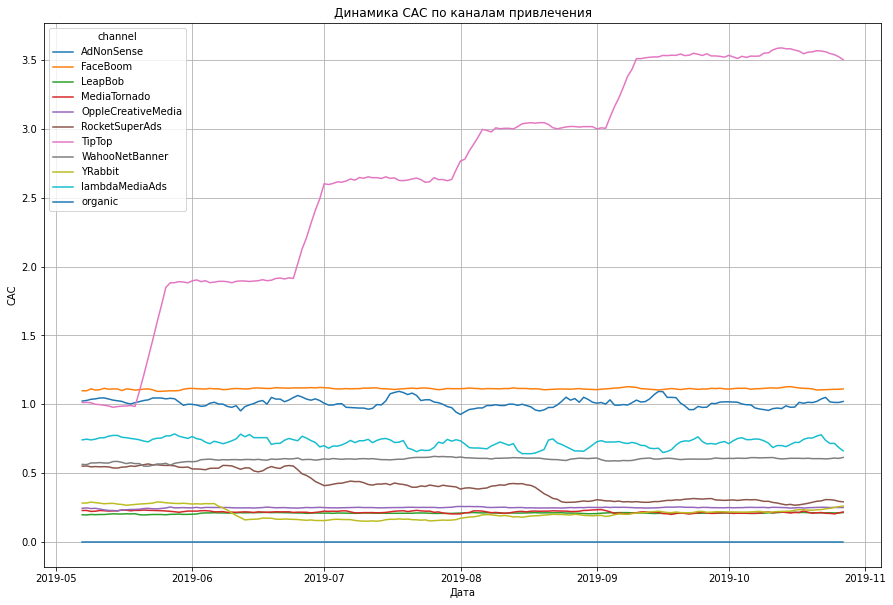

In [49]:
data = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')

window = 7

filter_data(data, window).plot(figsize=(15, 10), grid=True)

plt.ylabel('CAC')
plt.xlabel('Дата')
plt.title('Динамика САС по каналам привлечения')
plt.show()

#### Промежуточные выводы по маркетингу

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">

        1. Общая сумма расходов на маркетинг за период с 1 мая по 27 октября составила чуть более ста тысяч $ (по условию задания не указаны единицы измерения, будем считать далее, что в долларах). 
    2. Более половины расходов пришлись на канал TipTop - 54000$, далее FaceBoom - 30000$. Расходы на остальные каналы значительно ниже. 
    3. Каждый месяц расходы росли с 10000$ в мае до 22000$ в сентябре. 
    4. График динамики расходов по каналам подтверждаем высокие и в среднем по месяцам увеличивающиеся траты на маркетинг по каналам TipTop и FaceBoom. Прочие каналы существенно уступают по объему расходов.
    5. Стоимость привлечения органических пользователей во всех когортах, распределенных по каналам, равна нулю, потому что они не были привлечены за счет рекламы. Привлечение одного пользователя из канал TipTop обошлось компании в среднем в 2,7$, из FaceBoom - 1,1$, из AdNonSense - 1$. 
        6. Если по большинству каналов расходы на протяжении всего времени были примерно равномерными, то TipTop на их фоне значительно выделяется, т.к. расходы на одного пользователя стабильно росли почти каждый месяц. Средний CAC по всему проекту бех учёта органических пользователей составил 1,11$.
    
    
</div>  

### Оценка окупаемости рекламы

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [50]:
# исключение органических пользователей из таблицы
profiles = profiles.query('channel != "organic"')

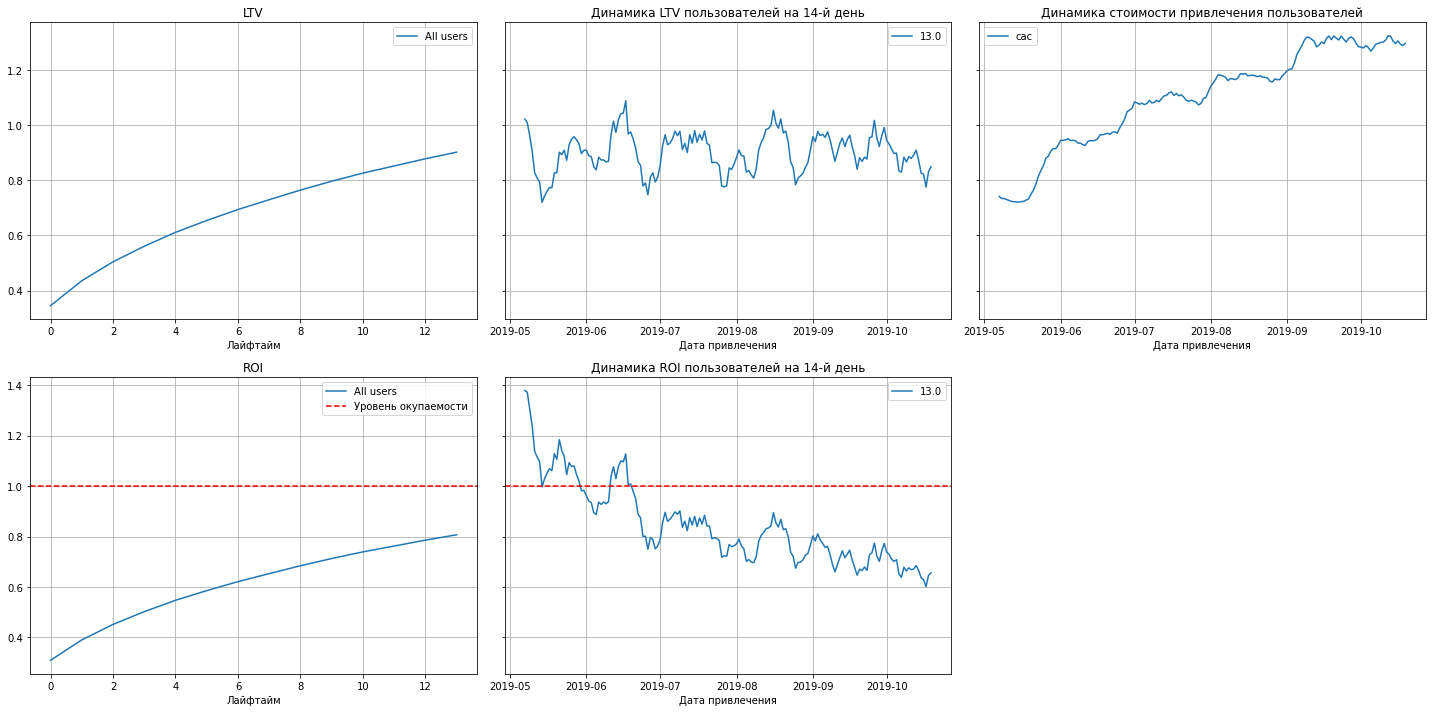

In [51]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из графиков можно сделать вывод, что ROI находится ниже уровня окупаемости. Динамика ROI пользователей на 14-й день падает все больше со временем. Динамика стоимости привлечения пользователей постепенно увеличивалась. LTV достаточно стабильно растет.

#### Конверсия и удержание пользователей и динамика их изменения

##### По типу устройства

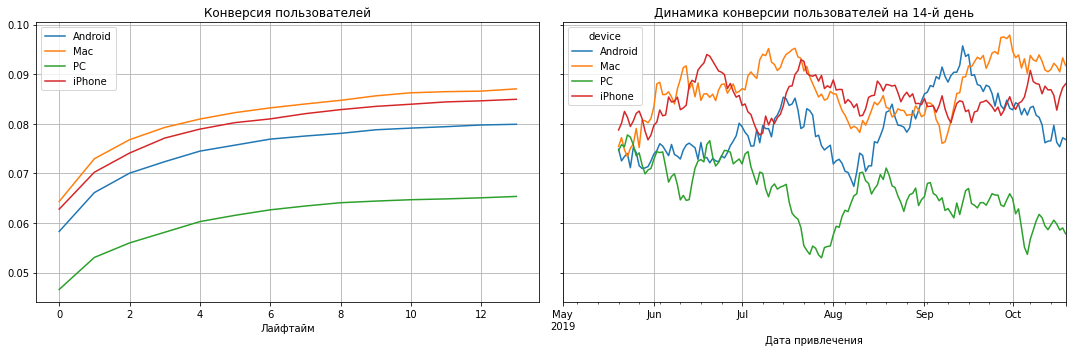

In [52]:
# конверсия с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

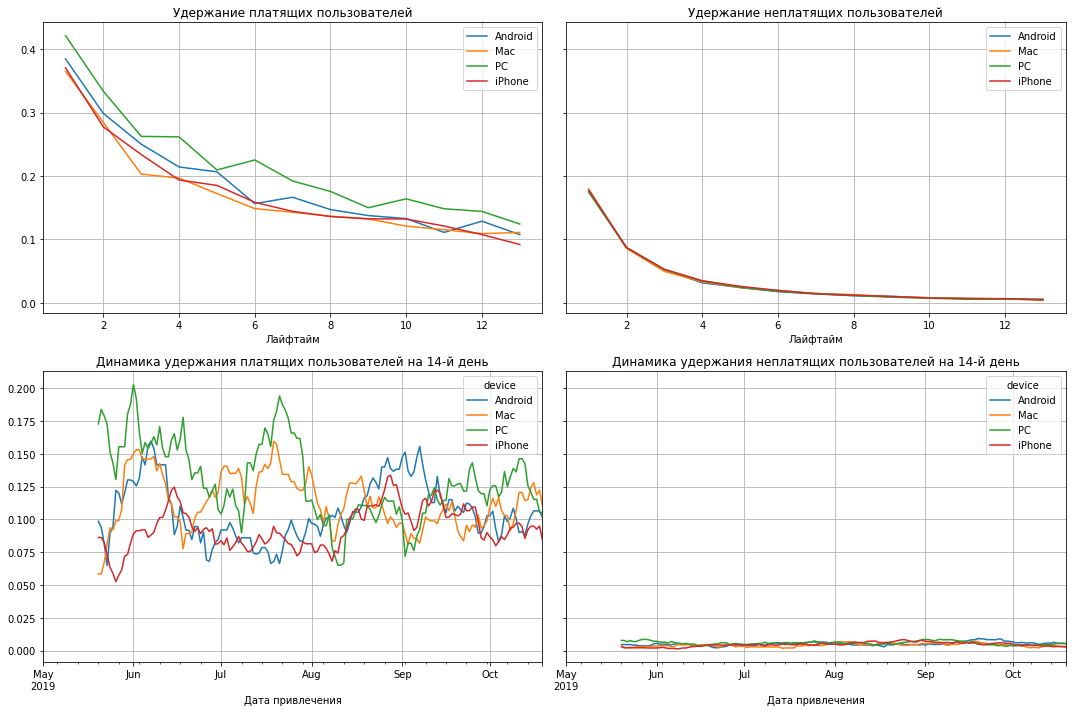

In [53]:
# удержание с разбивкой по устройствам

dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Mac и iPhone конвертируются лучше остальных устройств, PC отстает. При этом по удержанию PC показал чуть более лучшие результаты.

##### По региону

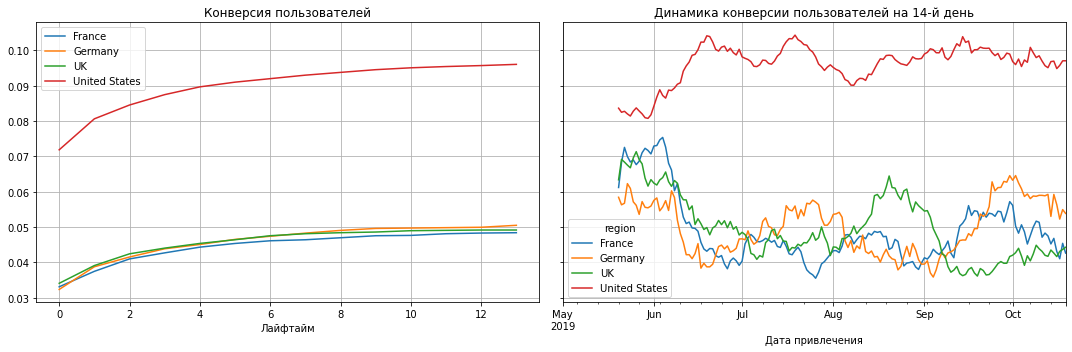

In [54]:
# конверсия с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

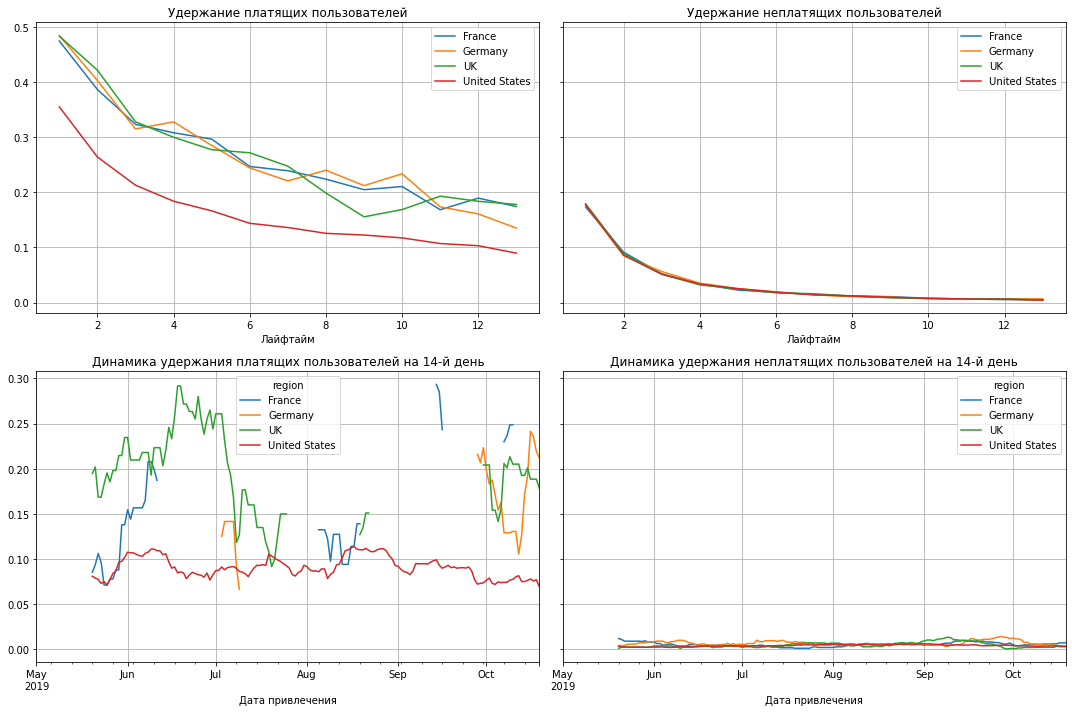

In [55]:
# удержание с разбивкой по регионам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

С разбивкой по регионам США примерно в 2 раза опережают другие станы по конверсии, но проигрывают в удержании.

##### По рекламному источнику

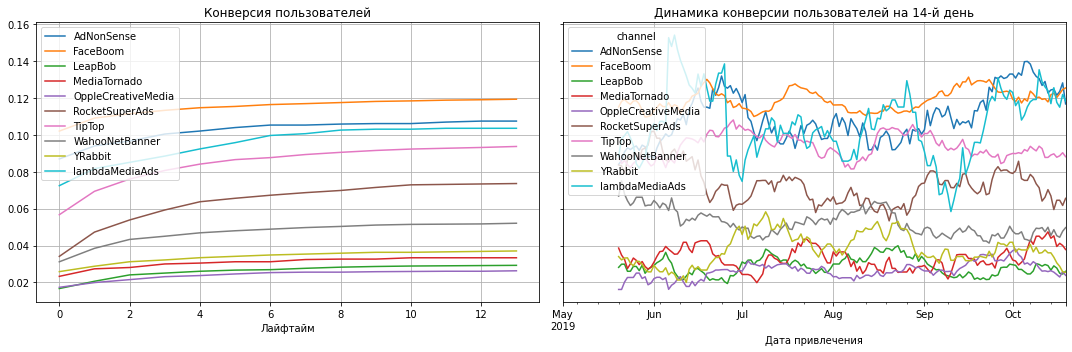

In [56]:
# конверсия с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

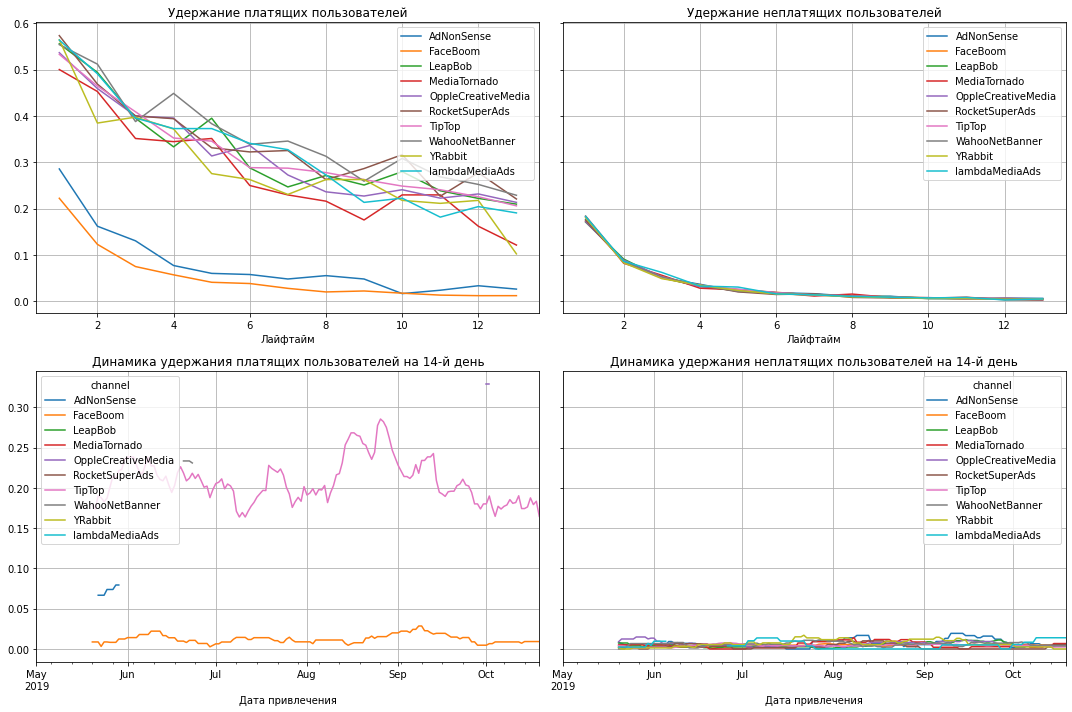

In [57]:
# удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Хуже всех удерживаются пользователи из FaceBoom, хотя имеют лучшую конверсию. Также одним из худших по удержанию оказался рекламный источник AdNonSense.

#### Окупаемость рекламы

##### Разбивка по устройствам

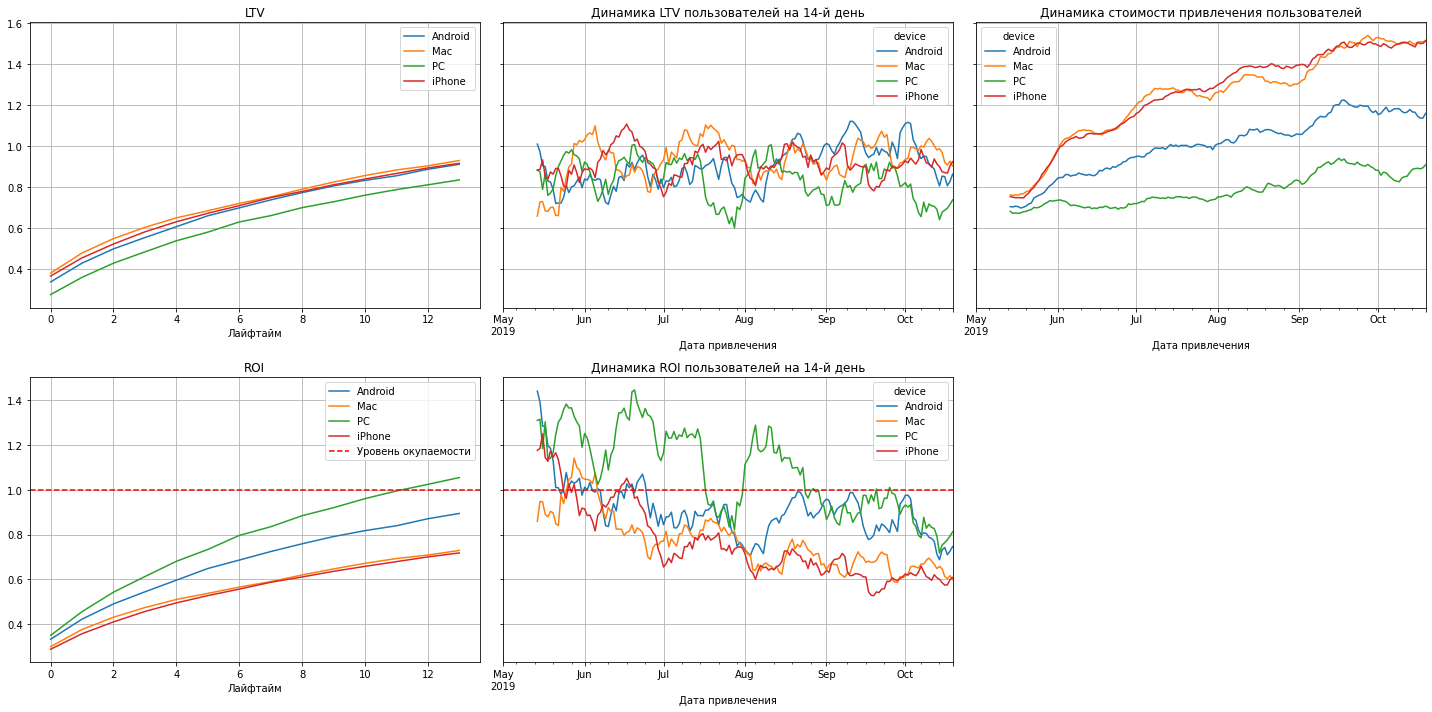

In [58]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи PC окупаются, в отличие от Android, Mac и iPhone. Динамика стоимости привлечения клиентов показывает, что наименьшие расходы были как раз в отношении пользователей PC. На графике заметно снижение динамики ROI у всех устройств при росте стоимости привлечения пользователей.

##### Разбивка по странам

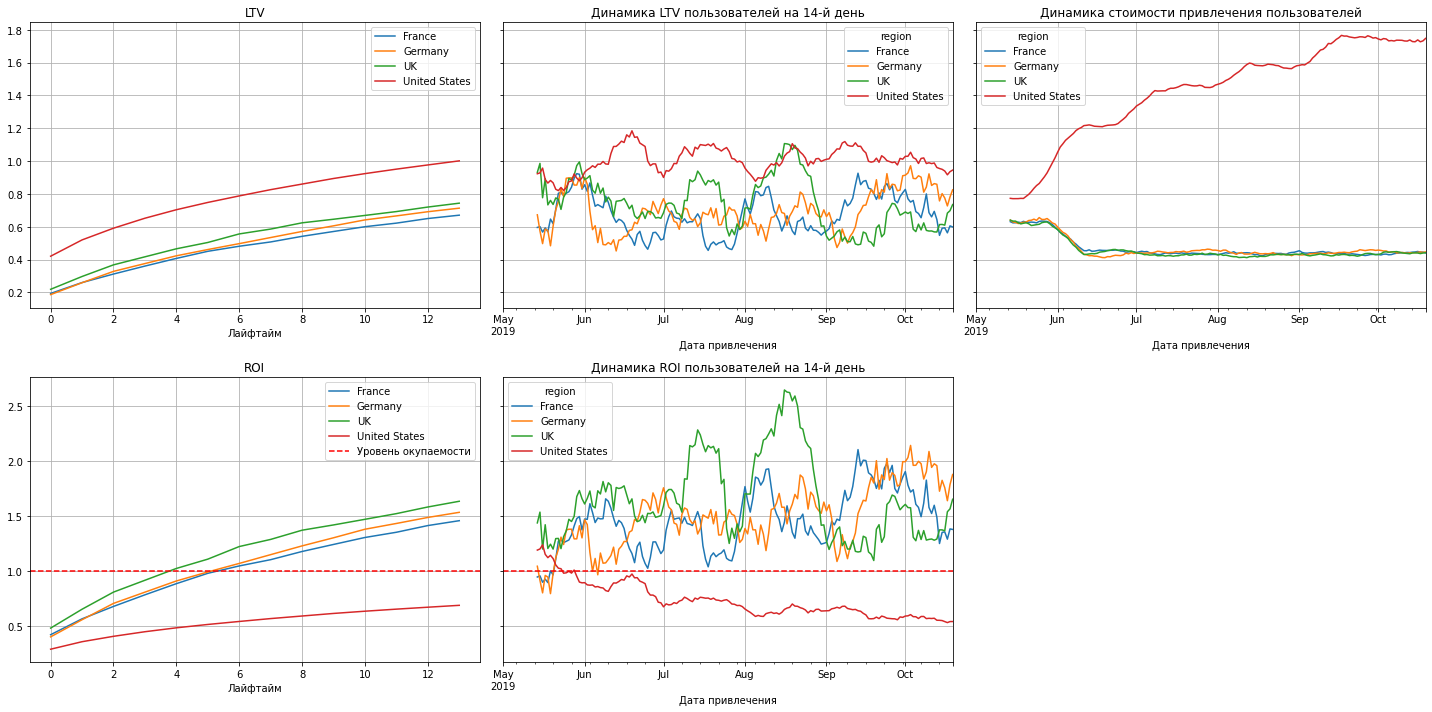

In [59]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупилась только в США. Динамика стоимости привлечения пользователей показывает огромный разрыв расходов в США по сравнению с другими странами; стоимость в США существенно выше. Динамика ROI показывает снижение окупаемости на пользователя из США ниже уровня безубыточности. Динамика LTV подвержена сезонности и стабильна. LTV в США выше, чем в других странах.

##### Разбивка по рекламным каналам

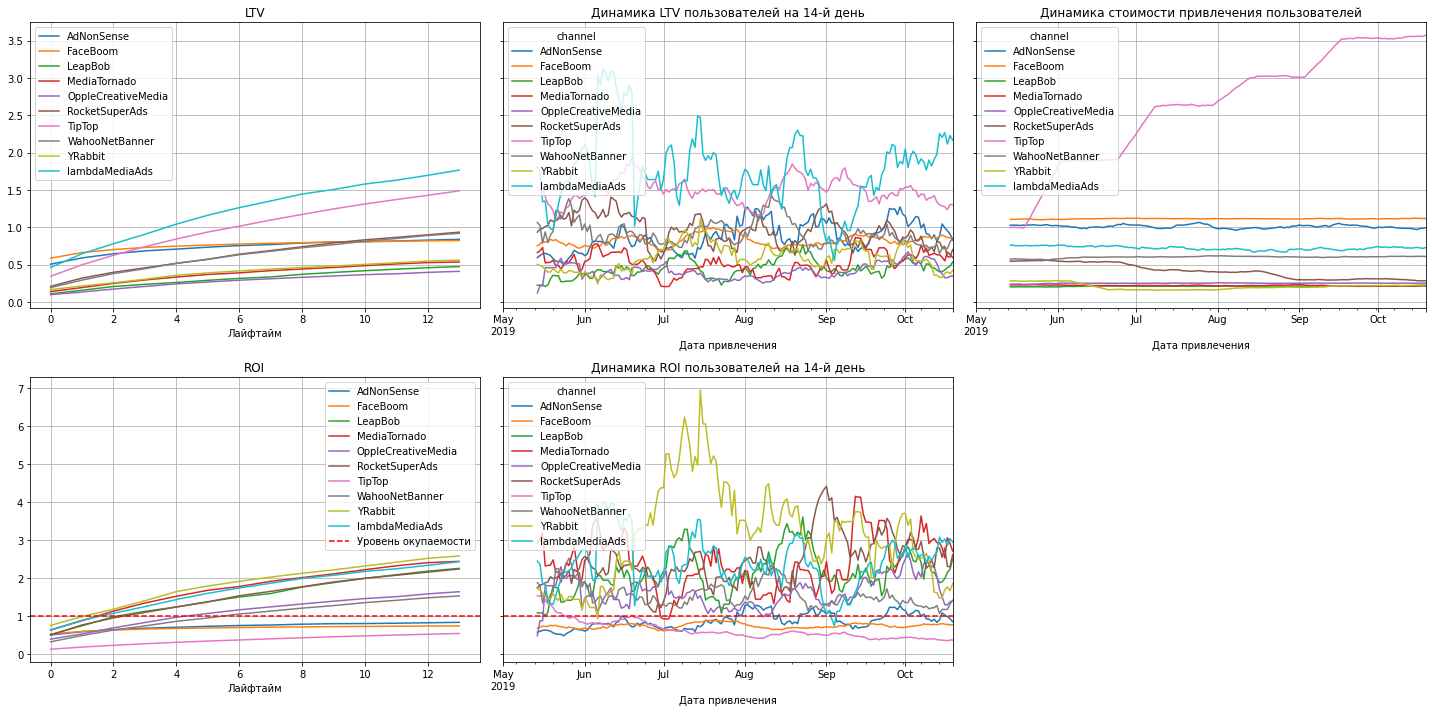

In [60]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Динамика стоимости привлечения пользователей наиболее высокая у канала TipTop. Но такие расходы не привели к окупаемости. У остальных динамика стабильная. Из 10 каналов только 3 находятся ниже уровня окупаемости, включая TipTop.

#### Показатели в разбивке США-Европа

In [61]:
# добавляем колонку с континентом, чтобы оценить бизнес-показатели в разрезе США-Европа

_dict = {'United States': 'USA', 'Germany': 'Europe', 'France': 'Europe', 'UK': 'Europe'}
profiles['continent'] = profiles['region'].map(_dict)

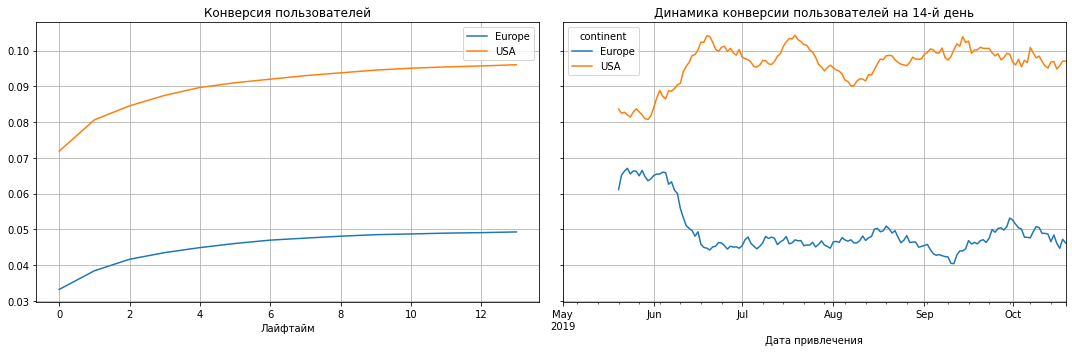

In [62]:
dimensions = ['continent']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

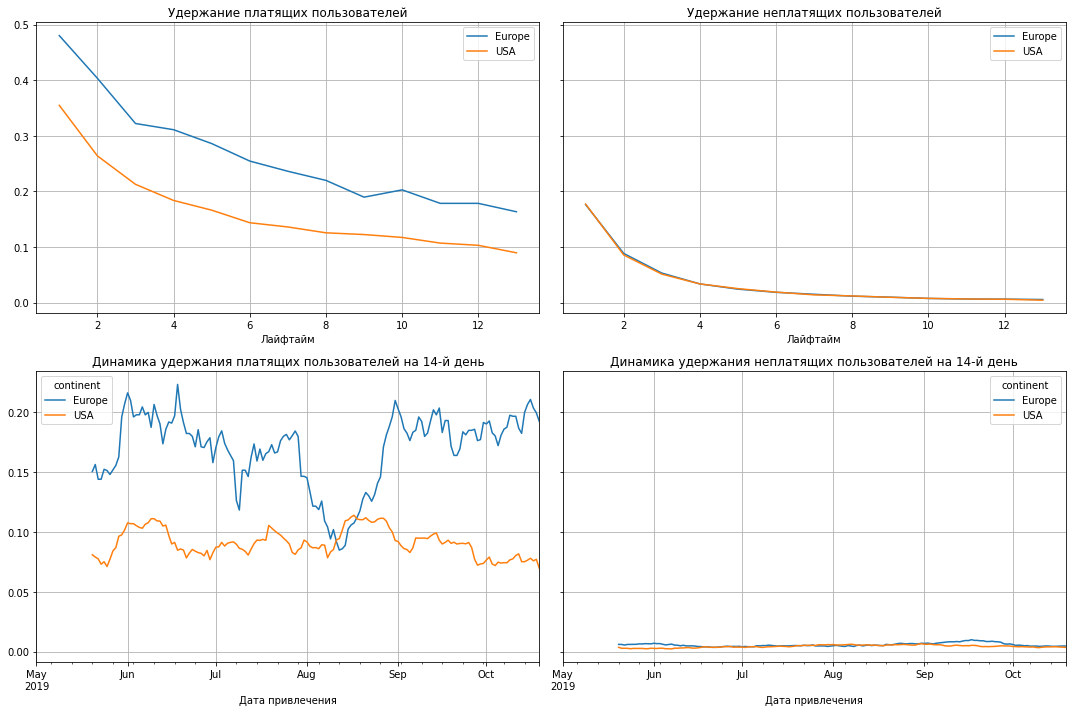

In [63]:
# удержание с разбивкой по регионам
dimensions = ['continent']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

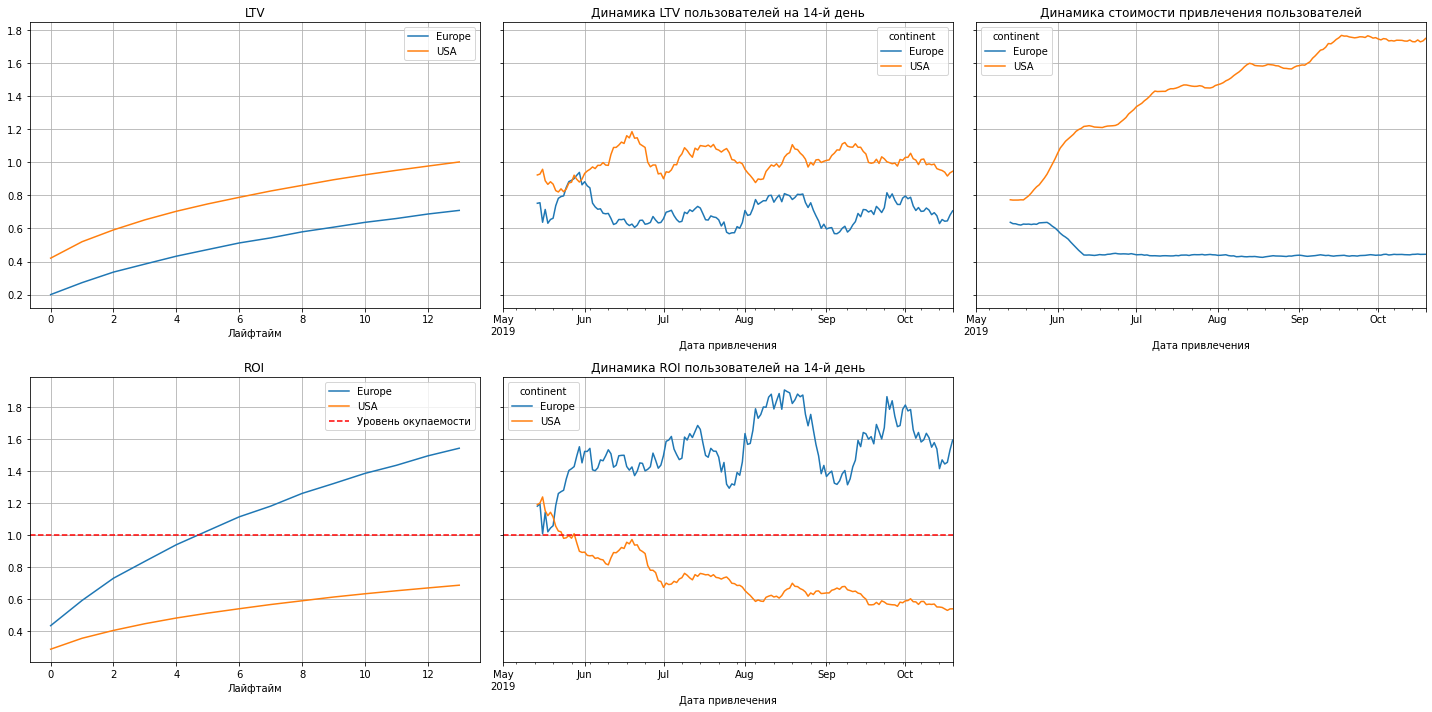

In [64]:
dimensions = ['continent']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Бизнес-показатели в разрезе США-Европа подтверждают, то что было видно из разбивки по странам: 
 - США примерно в 2 раза опережают Европу по конверсии, при этом имеют большие проблемы с удержанием платящих пользователей.

 - А также, что реклама окупилась в Европе, но не окупилась в США. Динамика стоимости привлечения пользователей показывает огромный разрыв расходов в США по сравнению с Европой; стоимость в США существенно выше. Динамика ROI показывает снижение окупаемости на пользователя из США ниже уровня безубыточности, в отличии от стран Европы.

#### Промежуточные выводы по оценке окупаемости

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">

- Окупается ли реклама, направленная на привлечение пользователей в целом?
    
Нет. В целом, окупаемость рекламы со временем падает, а стоимость привлечения пользователей растет. В рассматриваемый период реклама в итоге не окупилась.

- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    
    1. Из всех стран США оказались единственной страной, которая продемонстрировала убытки по ROI. Возрастающие расходы на привлечение клиентов не оправдались.

    2. В разрезе по устройствам выявлено снижение динамики окупаемости к 14 дню у всех девайсов при росте стоимости привлечения пользователей. Mac и iPhone, а также Android показали результаты ниже уровня окупаемости, при этом у них же выявлены наибольшие расходы на привлечение. В США пользователи всех устройств не принесли достаточно денег, чтобы реклама на них окупилась.

    3. Чрезмерные расходы обнаружены на канал TipTop, который в результате не показал положительных результатов по ROI.   


- Чем могут быть вызваны проблемы окупаемости?
    
Черезмерные расходы на привлечение пользователей в США и на канал TipTop.
</div>  

### Общие выводы

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">

Проведен маркетинговый анализ развлекательного приложения Procrastinate Pro+. Выявлены причины убытков компании.
 
    
**Первичный анализ данных:**
    
    - В анализе рассматриваются пользователи из четырёх стран: США, Великобритании, Франции и Германии
    - Типов устройств пользователя тоже четыре: iPhone, Android, PC, Mac
    - Есть 10 разных каналов привлечения пользователей
    - Больше всего пользователей органические (заинтересованные пользователи, которые зашли на сайт по прямой ссылке или с помощью обычных запросов в поисковых системах, а не платных рекламных объявлений)
    - Дата анализа как 1 ноября 2019 года, горизонт 2 недели
    - Рекламных кампаний было 1800 по 180 штук на каждый канал
    - Все данные приведены к требуемому типу, пропусков и дубликатов не выявлено
    
  
**Исследовательский анализ данных:**
    
    1. Мы работаем с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Дата анализа выбрана как 1 ноября 2019 года. Горизонт анализа примем равным двум неделям.
    2. США существенно опережают остальные страны по количеству пользователей - 100 тысяч. Доля платящих пользователей также выше в США - 6,9%.
    3. iPhone - самое популярное устройство. Количество клиентов - 54 тысячи, доля платящих пользователей - 6,2% (у MAC доля немного больше - 6,3% при 30 тысячах пользователей).
    4. Больше всего пользователей, которые зашли на сайт по прямой ссылке или с помощью обычных запросов в поисковых системах, а не платных рекламных объявлений, таких 56 тысяч. Из них 1160 платящие - 2% это наименьшая доля среди остальных источников. Больше всего платных пользователей пришли с FaceBoom (3557 - 12,2%) и TipTop (1878 - 9,6%). Также высокие доли платных пользователей у AdNonSense (11,3%) и lambdaMediaAds (10,4%).
    
**Маркетинг:**
    
    1. Общая сумма расходов на маркетинг за период с 1 мая по 27 октября составила чуть более 100000$. 
2. Более половины расходов пришлись на канал TipTop - 54000$, далее FaceBoom - 30000$. Расходы на остальные каналы значительно ниже. 
3. Каждый месяц расходы росли с 10000$ в мае до 22000$ в сентябре. 
4. График динамики расходов по каналам подтверждает высокие и в среднем по месяцам увеличивающиеся траты на маркетинг по каналам TipTop и FaceBoom. Прочие каналы существенно уступают по объему расходов.
5. Привлечение одного пользователя из канал TipTop обошлось компании в среднем в 2,7$, из FaceBoom - 1,1$, из AdNonSense - 1$. 
    6. Если по большинству каналов расходы на протяжении всего времени были примерно равномерными, то TipTop на их фоне значительно выделяется, т.к. расходы на одного пользователя стабильно росли почти каждый месяц. Средний CAC по всему проекту без учёта органических пользователей составил 1,11$.
    
**Оценка окупаемости:**
    
    1. В целом, окупаемость рекламы со временем падает, а стоимость привлечения пользователей растет. В рассматриваемый период реклама не окупилась.
    2. Из всех стран США оказались единственной страной, которая продемонстрировала убытки по ROI. Возрастающие расходы на привлечение клиентов не оправдались.
    3. В разрезе по устройствам выявлено снижение динамики окупаемости к 14 дню у всех девайсов при росте стоимости привлечения пользователей. Mac и iPhone, а также Android показали результаты ниже уровня окупаемости, при этом у них же выявлены наибольшие расходы на привлечение. В США пользователи всех устройств не принесли достаточно денег, чтобы реклама на них окупилась.
    4. Черезмерные расходы обнаружены на канал TipTop, который в результате не показал положительных результатов по ROI.


**Причины:**

    При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам выявлено, что причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей. Стоимость рекламы неоптимальная, выявлены черезмерные расходы на привлечение пользователей в США и на канал TipTop.

**Позитивные тенденции:**

    Расходы окупились по пользователям PC, а также по пользователям из Франции, Германии и Великобритании. ROI 7 каналов из 10 оказались выше уровня окупаемости.

**Рекомендация:**

    Оптимизировать затраты на маркетинг для США и источника TipTop.

</div>  